In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [56]:
df = pd.read_csv('agriculture.csv')

In [57]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions totals,356,India,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,2018,2018,3050,FAO TIER 1,kt,22645.0185,E,Estimated value,NaN
1,GT,Emissions totals,356,India,723113,Emissions (CO2eq) (AR5),5064,Crop Residues,2018,2018,3050,FAO TIER 1,kt,22645.0185,E,Estimated value,NaN
2,GT,Emissions totals,356,India,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,2019,2019,3050,FAO TIER 1,kt,22760.1610,E,Estimated value,NaN
3,GT,Emissions totals,356,India,723113,Emissions (CO2eq) (AR5),5064,Crop Residues,2019,2019,3050,FAO TIER 1,kt,22760.1610,E,Estimated value,NaN
4,GT,Emissions totals,356,India,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,2020,2020,3050,FAO TIER 1,kt,23823.4735,E,Estimated value,NaN


In [58]:
df = df.drop(columns=['Domain Code', 'Domain', 'Year', 'Area Code (M49)', 'Area', 'Year Code', 'Source Code', 'Source', 'Unit', 'Flag', 'Flag Description', 'Note', 'Element Code'])

In [59]:
df.head()

,Element,Item Code,Item,Value
0,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,22645.0185
1,Emissions (CO2eq) (AR5),5064,Crop Residues,22645.0185
2,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,22760.1610
3,Emissions (CO2eq) (AR5),5064,Crop Residues,22760.1610
4,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,23823.4735


In [60]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [61]:
df.head()

,Element,Item Code,Item,Value
0,4,5064,2,22645.0185
1,1,5064,2,22645.0185
2,4,5064,2,22760.1610
3,1,5064,2,22760.1610
4,4,5064,2,23823.4735


In [62]:
X = df.drop(columns=['Element'])
y = df['Element']

In [63]:
df.head()

,Element,Item Code,Item,Value
0,4,5064,2,22645.0185
1,1,5064,2,22645.0185
2,4,5064,2,22760.1610
3,1,5064,2,22760.1610
4,4,5064,2,23823.4735


In [64]:
X.head()

,Item Code,Item,Value
0,5064,2,22645.0185
1,5064,2,22645.0185
2,5064,2,22760.1610
3,5064,2,22760.1610
4,5064,2,23823.4735


In [65]:
y.head()

0    4
1    1
2    4
3    1
4    4
Name: Element, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
import pickle

# Save the model
with open('models/random_forest_agri.pkl', 'wb') as file:
  pickle.dump(clf, file)

# Load the model
with open('models/random_forest_agri.pkl', 'rb') as file:
  loaded_clf = pickle.load(file)

In [70]:
y_pred = loaded_clf.predict(X_test)

In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6739130434782609
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.64      0.62      0.63        37
           2       0.58      0.79      0.67        14
           3       1.00      1.00      1.00         3
           4       0.83      0.68      0.75        28

    accuracy                           0.67        92
   macro avg       0.72      0.74      0.72        92
weighted avg       0.69      0.67      0.68        92



# Visualise Training Results

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

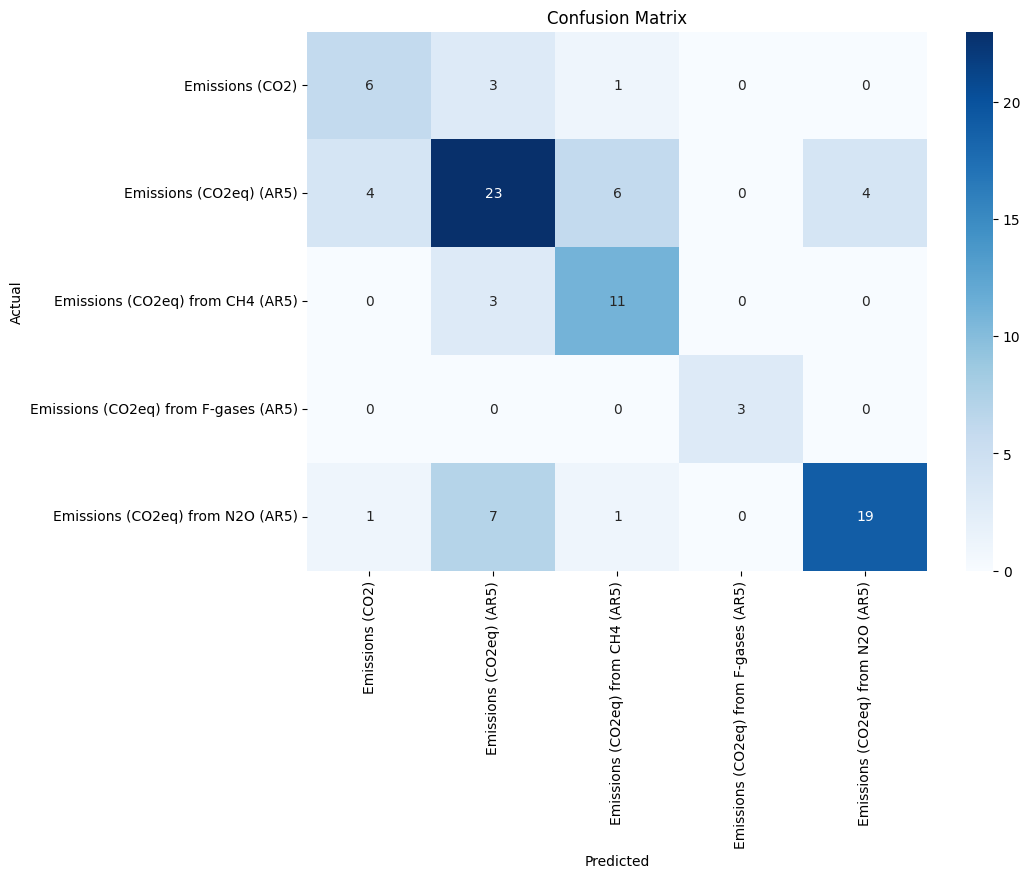

In [73]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Element'].classes_, yticklabels=label_encoders['Element'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

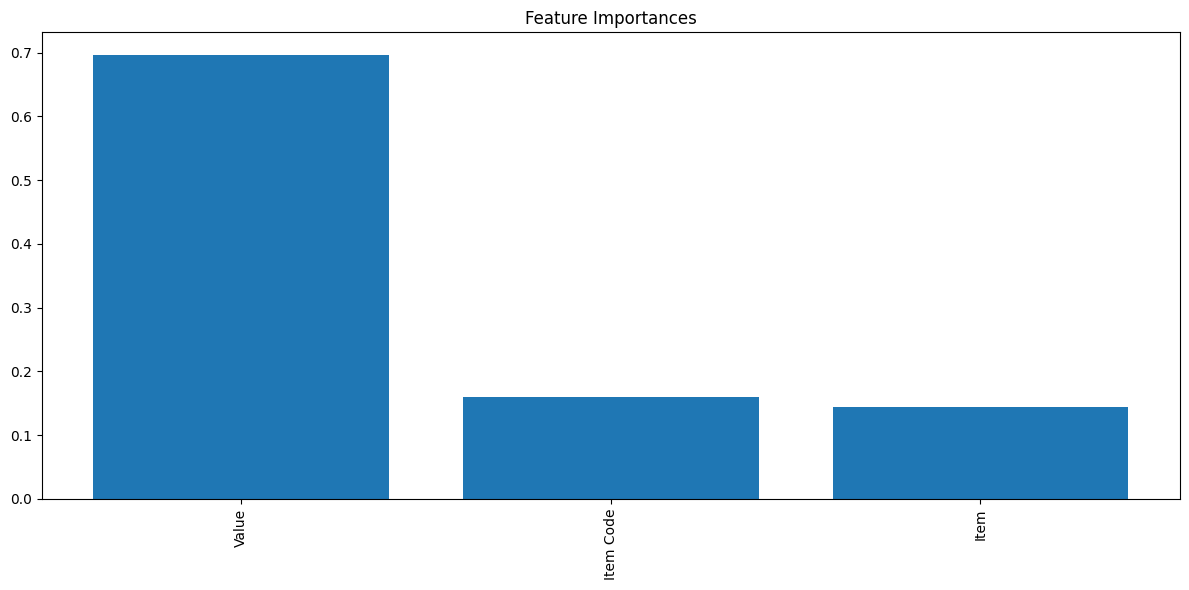

In [74]:
importances = loaded_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()